In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [18]:
data = pd.read_csv('consolidated_data.csv')
print(data.shape)

(8589, 10)


In [19]:
data.head()

,Rank,Organization Breached,Records Breached,Date of Breach,Type of Breach,Source of Breach,Location,Industry,Risk Score,Reference
0,1,"Adobe Systems, Inc",1.520000e+08,9/18/2013,Financial Access,Malicious Outsider,United States,Technology,10.0,http://www.hindustantimes.com/technology/Chunk...
1,2,MySpace,3.600000e+08,6/11/2013,Account Access,Malicious Outsider,United States,Other,10.0,http://www.pcmag.com/news/344876/myspace-breac...
2,3,Target,1.100000e+08,11/4/2013,Financial Access,Malicious Outsider,United States,Retail,10.0,http://nypost.com/2013/12/22/chase-bank-opens-...
3,4,Yahoo,1.000000e+09,8/9/2013,Identity Theft,Malicious Outsider,United States,Technology,10.0,https://www.nytimes.com/2016/12/14/technology/...
4,5,Country's Supreme Election Committee (YSK),5.400000e+07,12/16/2013,Identity Theft,Malicious Outsider,Turkey,Government,9.9,http://www.hurriyetdailynews.com/russian-hacke...


In [20]:
data.columns

Index(['Rank', 'Organization Breached', 'Records Breached', 'Date of Breach',
       'Type of Breach', 'Source of Breach', 'Location', 'Industry',
       'Risk Score', 'Reference'],
      dtype='object')

In [21]:
for i in data.columns:
    print(i, type(data[i][0]))

Rank <class 'numpy.int64'>
Organization Breached <class 'str'>
Records Breached <class 'numpy.float64'>
Date of Breach <class 'str'>
Type of Breach <class 'str'>
Source of Breach <class 'str'>
Location <class 'str'>
Industry <class 'str'>
Risk Score <class 'numpy.float64'>
Reference <class 'str'>


In [22]:
data['Records Breached'].isnull().sum()

4144

In [23]:
clean_data = data.dropna(subset=['Records Breached'])
print(clean_data.shape)

(4445, 10)


In [24]:
clean_data.isnull().sum().sum()

27

In [25]:
clean_data['Reference'].isnull().sum()

27

In [26]:
clean_data = clean_data.drop(['Rank', 'Organization Breached', 'Date of Breach', 'Location', 'Reference'], axis=1)
clean_data.head()

,Records Breached,Type of Breach,Source of Breach,Industry,Risk Score
0,1.520000e+08,Financial Access,Malicious Outsider,Technology,10.0
1,3.600000e+08,Account Access,Malicious Outsider,Other,10.0
2,1.100000e+08,Financial Access,Malicious Outsider,Retail,10.0
3,1.000000e+09,Identity Theft,Malicious Outsider,Technology,10.0
4,5.400000e+07,Identity Theft,Malicious Outsider,Government,9.9


In [27]:
print(clean_data.shape)

(4445, 5)


In [28]:
clean_data['Type of Breach'].value_counts()

Identity Theft      3011
Account Access       525
Financial Access     451
Nuisance             286
Existential Data     172
Name: Type of Breach, dtype: int64

In [29]:
clean_data['Source of Breach'].value_counts()

Malicious Outsider    2511
Accidental Loss       1181
Malicious Insider      591
Hacktivist              83
State Sponsored         63
Unknown                 16
Name: Source of Breach, dtype: int64

In [30]:
clean_data['Industry'].value_counts()

Healthcare               1714
Government                698
Other                     480
Education                 433
Financial                 351
Technology                325
Retail                    305
Entertainment              38
Industrial                 28
Hospitality                21
Professional Services      16
Non-profit                 15
Insurance                  13
Social Media                6
other                       2
Name: Industry, dtype: int64

In [31]:
print(clean_data['Records Breached'].min(), clean_data['Records Breached'].max())

1.0 1340000000.0


In [32]:
encoded_column2 = pd.get_dummies(clean_data['Type of Breach'])
encoded_column2.head()

,Account Access,Existential Data,Financial Access,Identity Theft,Nuisance
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [33]:
encoded_column3 = pd.get_dummies(clean_data['Source of Breach'])
encoded_column4 = pd.get_dummies(clean_data['Industry'])

In [34]:
encoded_data = clean_data.drop(['Type of Breach', 'Source of Breach', 'Industry'], axis=1)
encoded_data = encoded_data.join(encoded_column2)
encoded_data = encoded_data.join(encoded_column3)
encoded_data = encoded_data.join(encoded_column4)
encoded_data.head()

,Records Breached,Risk Score,Account Access,Existential Data,Financial Access,Identity Theft,Nuisance,Accidental Loss,Hacktivist,Malicious Insider,...,Hospitality,Industrial,Insurance,Non-profit,Other,Professional Services,Retail,Social Media,Technology,other
0,1.520000e+08,10.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3.600000e+08,10.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.100000e+08,10.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.000000e+09,10.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.400000e+07,9.9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


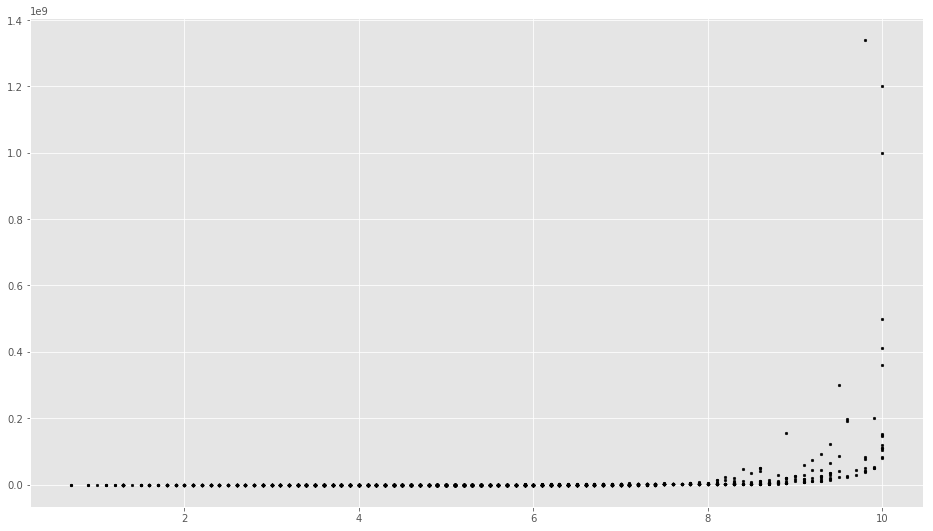

In [37]:
# Plot Records Breached vs Risk Score to see if there's a discernible relationship.
# At a high level, the Risk Score seems to increase as the the number of Records Breached increases (but not
#    in linear fashion).  Scaling may be an issue since Records Breached has a very wide range: 1 - 1.4B
#
f1 = encoded_data['Risk Score'].values
f2 = encoded_data['Records Breached'].values
X = np.array(list(zip(f1, f2)))

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(f1, f2, c='black', s=7)
plt.show()

In [39]:
# To see how the other features introduce groupings in data, conduct K Means Clustering analysis.
# For this analysis, drop the Risk Score column since it's not actually a feature, but rather a target/response variable.
reduced_data = encoded_data.drop(['Risk Score'], axis=1)
reduced_data.shape

(4445, 27)

In [40]:
# Perform K Means Cluster analysis
kmeans = KMeans(n_clusters=4)
# Fit input data
kmeans = kmeans.fit(reduced_data)
# Get cluster labels
labels = kmeans.predict(reduced_data)
# Centroid values: cooridnates in a 27 dimmensional space.
# It appears first clusterring occurs as a result of the number of breaches which is our only
#    numeric feature.
centroids = kmeans.cluster_centers_
print(centroids)

[[  5.02509216e+05   1.17021277e-01   3.87052965e-02   1.01403350e-01
    6.78813943e-01   6.40561340e-02   2.65504753e-01   1.87867813e-02
    1.33544590e-01   5.64735174e-01   1.38071526e-02   3.62154821e-03
    9.80081485e-02   8.37483024e-03   7.83159801e-02   1.56631960e-01
    3.87732005e-01   4.75328203e-03   6.33770937e-03   2.94250792e-03
    3.39520145e-03   1.08193753e-01   3.62154821e-03   6.81303757e-02
    1.35808058e-03   7.17519239e-02   4.52693526e-04]
 [  1.18000000e+09   3.33333333e-01   0.00000000e+00   0.00000000e+00
    3.33333333e-01   3.33333333e-01   3.33333333e-01   0.00000000e+00
    0.00000000e+00   6.66666667e-01   0.00000000e+00  -4.33680869e-19
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   3.33333333e-01  -4.33680869e-19   0.00000000e+00
    2.16840434e-19   6.66666667e-01  -5.42101086e-20]
 [  1.19783399e+08   2.00000000e-01  -6.93889390e-18

In [41]:
# Reperform K Means Cluster analysis w/o Records Breached
# All categorical features
reduced_data_all_cat = reduced_data.drop(['Records Breached'], axis=1)
reduced_data_all_cat.shape

(4445, 26)

In [43]:
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(reduced_data_all_cat)
# Getting the cluster labels
labels = kmeans.predict(reduced_data_all_cat)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

[[  2.20541903e-02   1.82734720e-02   6.30119723e-03   8.85948330e-01
    6.74228103e-02   6.86200378e-01   1.70132325e-02   2.77252678e-01
   -6.43929354e-15   1.19722747e-02   7.56143667e-03   9.32577190e-02
    3.15059861e-03   6.11216131e-02   2.33144297e-01   4.65028355e-01
    3.78071834e-03   3.15059861e-03   2.52047889e-03   3.78071834e-03
    6.61625709e-02   3.78071834e-03   3.59168242e-02   1.10588622e-17
    2.52047889e-02   4.66206934e-18]
 [ -1.41553436e-15   1.02347983e-02   3.19189120e-16   9.66285370e-01
    2.34798314e-02  -5.93969318e-15  -1.38777878e-17   1.30451205e-15
    1.00000000e+00  -1.21430643e-16   4.85722573e-17   1.18001204e-01
    7.82661048e-03   4.39494281e-02   9.45213727e-02   5.54485250e-01
    5.41842264e-03   9.63275135e-03   3.61228176e-03   3.01023480e-03
    7.64599639e-02   4.21432872e-03   3.37146297e-02   1.80614088e-03
    4.33473811e-02   6.07153217e-18]
 [  4.09356725e-01   1.05263158e-01   3.68421053e-01   1.06581410e-14
    1.16959064e-